In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_review = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_review.json', lines = True)

In [3]:
review = yelp_review
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [4]:
print(yelp_review.shape,yelp_review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635403 entries, 0 to 8635402
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 592.9+ MB
(8635403, 9) None


In [5]:
yelp_review.nunique()

review_id      8635403
user_id        2189457
business_id     160585
stars                5
useful             233
funny              190
cool               207
text           8616410
date           8485984
dtype: int64

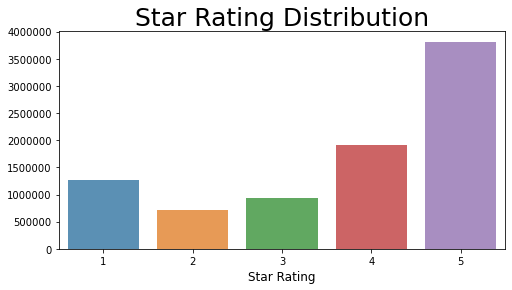

In [6]:
x=review.stars.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:6]

plt.figure(figsize=(8,4))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution",fontsize=25)
locs, labels = plt.xticks()
plt.ylabel('', fontsize=12)
plt.xlabel('Star Rating', fontsize=12)

plt.show()

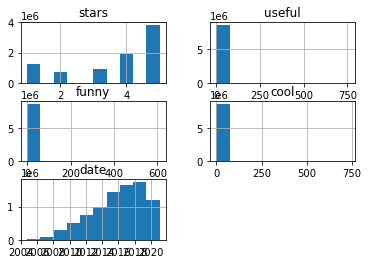

In [7]:
yelp_review.hist()
plt.ticklabel_format(style='plain', axis='y')

In [8]:
review.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,stars,useful,funny,cool
count,8635403.00,8635403.00,8635403.00,8635403.00
mean,3.73,1.25,0.42,0.50
std,1.46,3.20,1.87,2.24
min,1.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,758.00,610.00,732.00


In [9]:
yelp_review['text length'] = yelp_review['text'].apply(len)
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,1856
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,701
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,578
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,390
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,181


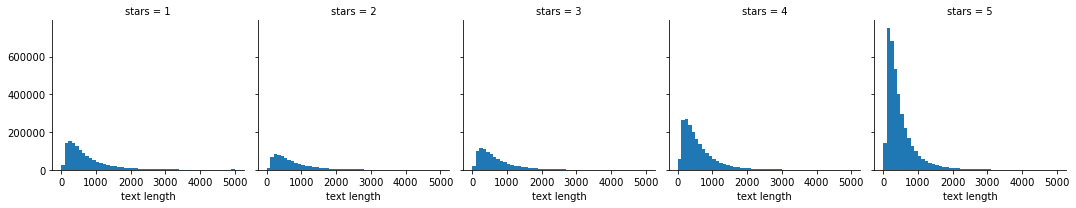

In [10]:
g = sns.FacetGrid(data=yelp_review, col='stars')
g.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='stars', ylabel='text length'>

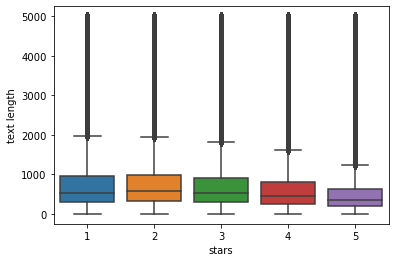

In [11]:
sns.boxplot(x='stars', y='text length', data=yelp_review)

In [12]:
stars = yelp_review.groupby('stars').mean()
stars.corr()

,useful,funny,cool,text length
useful,1.000000,0.735332,-0.821047,0.786271
funny,0.735332,1.000000,-0.475751,0.970243
cool,-0.821047,-0.475751,1.000000,-0.648738
text length,0.786271,0.970243,-0.648738,1.000000


<AxesSubplot:>

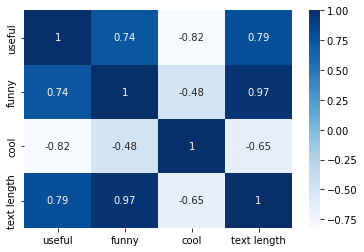

In [13]:
sns.heatmap(data=stars.corr(), annot=True, cmap="Blues")